In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving lost_kitten.txt to lost_kitten.txt


In [3]:
file = open("lost_kitten.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'On a quiet Sunday morning in the heart of a bustling city, young Emily discovered a tiny, trembling ball of fur huddled beneath a park bench. It was a kitten, no larger than a palm, with eyes wide and filled with vulnerability. Noticing that the kitten was alone and frightened, Emily, with her heart full of compassion, decided to befriend the little feline. She named it Whiskers, owing to the delicate white lines that adorned its tiny face. Determined to find Whiskers a loving home, Emily embark'

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]
len(sequence_data)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])
y = to_categorical(y, num_classes=vocab_size)
y[:5]

173
The Length of sequences are:  287
Data:  [[ 8  2 22]
 [ 2 22 23]
 [22 23 39]
 [23 39  9]
 [39  9  1]
 [ 9  1 12]
 [ 1 12  4]
 [12  4  2]
 [ 4  2 40]
 [ 2 40 14]]
Response:  [23 39  9  1 12  4  2 40 14 41]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [5]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             1730      
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 173)               173173    
                                                                 
Total params: 13223903 (50.45 MB)
Trainable params: 13223903 (50.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


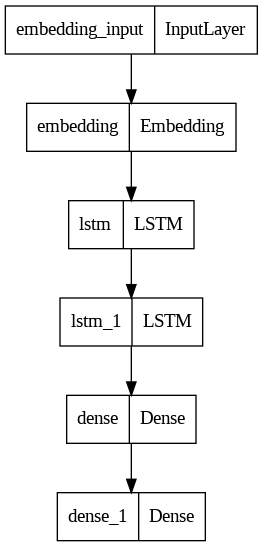

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='plot.png', show_layer_names=True)


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
5/5 [==============================] - ETA: 0s - loss: 5.1510
Epoch 1: loss improved from inf to 5.15096, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 7s 514ms/step - loss: 5.1510
Epoch 2/70
5/5 [==============================] - ETA: 0s - loss: 5.1010
Epoch 2: loss improved from 5.15096 to 5.10096, saving model to next_words.h5
5/5 [==============================] - 3s 527ms/step - loss: 5.1010
Epoch 3/70
5/5 [==============================] - ETA: 0s - loss: 4.8915
Epoch 3: loss improved from 5.10096 to 4.89155, saving model to next_words.h5
5/5 [==============================] - 4s 766ms/step - loss: 4.8915
Epoch 4/70
5/5 [==============================] - ETA: 0s - loss: 4.8320
Epoch 4: loss improved from 4.89155 to 4.83201, saving model to next_words.h5
5/5 [==============================] - 3s 589ms/step - loss: 4.8320
Epoch 5/70
5/5 [==============================] - ETA: 0s - loss: 4.8070
Epoch 5: loss improved from 4.83201 to 4.80704, saving model to next_words.h5
5/5 [==============================] - 3s 626ms/step - loss: 4.8070
Epoch 6/70
5/5 [==============================] - ETA: 0

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

['young', 'emily', 'discovered']
1/1 [==============================] - 2s 2s/step
a
['proving', 'that', 'somtimes']
1/1 [==============================] - 1s 879ms/step
in
